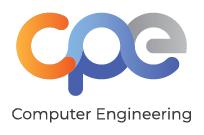

# Assignment9 Graph Algorithm

## สิ่งที่ได้เรียนรู้ภายในวันนี้
* Weighted Graph คือ กราฟที่มีค่าถ่วงน้ำหนักใน Edge และ Shortest Path หมายถึงเส้นทางที่มีน้ำหนักในการเดินน้อยที่สุด
- Algorithm ที่ใช้ในการ Shortest Path ของวันนี้ได้แก่
1. Floyd-Warshall's Algorithm คือ การหา Shortest Path ของ Vertex ทุกคู่ ใช้ได้ทั้งกราฟที่มีและไม่มีทิศทาง <br>
หลักการคือเราจะสร้าง Distance matrix D ขึ้นมา (ซึ่งคล้ายกับ Adjacency Matrix) โดยในเมทริกซ์จะ Represent ค่า weight ของ edge ที่ไป <br>
และถ้าหาก Vertex คู่ใดไม่มี edge ที่เชื่อมต่อกันจะแทนด้วย Infinity <br>
จากนั้นทำการเทียบว่ามีทางที่สามารถไปได้ผ่าน vertex อื่นหรือถ้าเส้นทางนั้นมีน้ำหนักที่น้อยกว่า ก็จะกำหนดค่าให้กับ matrix ใหม่ <br>
โดยในการ Implement เราจะใช้ for loop 3 ชั้น โดยเรียงจาก k , i , j และแต่ละค่าจะไล่ตั้งแต่ค่า 0 - ขนาดของ matrix <br>
เราจะเทียบด้วยสมการ D[i,j] เทียบกับ D[i,k] + D[k,j] ถ้าอันไหนน้อยกว่าให้กำหนดค่าลง D[i,j] <br>
สุดท้ายผลลัพธ์ที่ได้คือ Distance matrix ที่แสดงถึงระยะทางที่สั้นที่สุดจาก vertex ไปอีก vertex ทุกคู่ <br>

2. Dijkstra's Algorithm คือ การหา Shortest Path ของ vertex กำเนิด 1 ตัว ไปหาจุดอื่นทั้งหมดใน Graph <br>
โดยอัลกอริทึมนี้จะเป็นประเภท Greedy ALgorithm ก็คือจะเลือกค่าที่น้อยที่สุดในแต่ละ Case <br>
และจะใช้หลักการ Edge Relaxation ซึ่งจะทำการดูที่ตำแหน่ง Vertex ต่าง ๆ ถ้าหากมีเส้นทางที่ไปแล้วน้อยกว่าก็จะเลือกค่านั้น <br>

* Minimum spanning tree (MST) คือ Tree ที่จะเชื่อมต่อกับทุกจุดของ Graph และต้องมี Weight ของ edge รวมน้อยที่สุดจากทุกกรณี <br>
Key ที่สำคัญของ MST คือ จะต้องไม่มี Cyclic หรือวงปิดภายใน MST <br>
- Algorithm ที่ใช้ในการทำ Minimum spanning tree (MST) ได้แก่
1. Prim-Jarnik's Algorithm <br>
หลักการของ Prim คือเลือก Vertex เริ่มต้น และดู Edge ที่เชื่อมต่อกับตัวมัน แล้วให้พิจารณาค่า Edge ที่น้อยที่สุดในแต่ละรอบ <br>
Keyword : พิจารณา edge ที่น้อยที่สุดสำหรับทุก Case แล้วเลือกให้ครบทุก Vertex <br>
2. Kruskal's Algorithm <br>
หลักการเริ่มต้นด้วยการ Sorting ค่า Edge ก่อน จากนั้นจึงค่อย ๆ เลือกทีละ Edge จากน้อยไปมาก <br>
แต่ถ้าหากเลือก Edge นั้นมาแล้วทำให้เกิด Cycle หรือวงปิด ก็จะไม่เลือก Edge นั้นเข้ามา <br>
ในการเขียนโปรแกรมนั้น การที่จะเช็คว่าเกิด Cycle ใน Tree ของเราแล้วหรือไม่จะใช้ Data struture ที่ชื่อว่า Union-find set<br>
* Union-find set คือ Data structure ที่เอาไว้เก็บกลุ่ม หลักการคือ กำหนดให้กลุ่มนั้นมีตัวแทน (Representative) 1 คนต่อกลุ่ม

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice1 </span>: All pair shortest path 
### ------------------------------------------------------------------------------------
**Mission I**: Try to implement Floyd's algorithm and create a graph **g** and then use Floyd's algorithm to find distance matrix D <br>

![alt text](graph_ex1.jpg "Title")

In [13]:
from CPE112.Graph import Graph
from CPE112.Array import Matrix
import math

def Floyd(G,s):
    n = G.vertex_count()
    assert n > 0 , "There are no vertex in the graph."
    
    
    # สร้าง Matrix ใหม่ที่เอา Adjacency Matrix มาจาก Graph จากนั้นแปลงให้ 0 เป็น inf
    newMatrix = Matrix(n , n)
    newMatrix = G._MATRIX
    for i in range(n):
        for j in range(n):
            if newMatrix[i,j] == None and i != j:
                newMatrix[i,j] = math.inf # Assign ค่าที่สูงมาก ๆ เข้าไป
            elif i == j: # กรณีที่มันเป็นตัว Edge ของมันเอง
                newMatrix[i,j] = 0
            else: # เปลี่ยนจาก edge ให้เป็น ค่า weight ของ edge
                newMatrix[i,j] = newMatrix[i,j]._element 
    
    # เริ่มทำ Floyd's Algorithm
    for k in range(n):
        for i in range(n):
            for j in range(n):
                newMatrix[i,j] = min(newMatrix[i,j] , newMatrix[i,k] + newMatrix[k,j])

    print("The Floyd's Graph is : \n")
    print(newMatrix , "\n")
    # พอได้ตาราง Floyd's มาแล้ว ให้ทำการเลือก Distance จากช่องที่เราเลือก
    ndx = G.findindex(s)
    for i in range(n):
        if i != ndx:
            distance = newMatrix[ndx , i]
            print("Distance from " + str(s) + " to " + str(G._Vertices[i]) + " is " + str(distance))

In [14]:
g = Graph(10)
A = g.insert_vertex('A')
B = g.insert_vertex('B')
C = g.insert_vertex('C')
D = g.insert_vertex('D')
E = g.insert_vertex('E')
F = g.insert_vertex('F')
G = g.insert_vertex('G')
H = g.insert_vertex('H')
I = g.insert_vertex('I')
J = g.insert_vertex('J')

ab = g.insert_edge(A,B,2)
ae = g.insert_edge(A,E,1)
ag = g.insert_edge(A,G,5)
bc = g.insert_edge(B,C,2)
bj = g.insert_edge(B,J,5)
ce = g.insert_edge(C,E,1)
cf = g.insert_edge(C,F,6)
ci = g.insert_edge(C,I,5)
ed = g.insert_edge(E,D,2)
df = g.insert_edge(D,F,3)
dg = g.insert_edge(D,G,2)
gf = g.insert_edge(G,F,3)
fi = g.insert_edge(F,I,4)
hi = g.insert_edge(H,I,1)
hj = g.insert_edge(H,J,2)
ij = g.insert_edge(I,J,3)

In [15]:
Floyd(g,D)

The Floyd's Graph is : 

[ 0, 2, 2, 3, 1, 6, 5, 8, 7, 7 ]
[ 2, 0, 2, 5, 3, 8, 7, 7, 7, 5 ]
[ 2, 2, 0, 3, 1, 6, 5, 6, 5, 7 ]
[ 3, 5, 3, 0, 2, 3, 2, 8, 7, 10 ]
[ 1, 3, 1, 2, 0, 5, 4, 7, 6, 8 ]
[ 6, 8, 6, 3, 5, 0, 3, 5, 4, 7 ]
[ 5, 7, 5, 2, 4, 3, 0, 8, 7, 10 ]
[ 8, 7, 6, 8, 7, 5, 8, 0, 1, 2 ]
[ 7, 7, 5, 7, 6, 4, 7, 1, 0, 3 ]
[ 7, 5, 7, 10, 8, 7, 10, 2, 3, 0 ] 

Distance from D to A is 3
Distance from D to B is 5
Distance from D to C is 3
Distance from D to E is 2
Distance from D to F is 3
Distance from D to G is 2
Distance from D to H is 8
Distance from D to I is 7
Distance from D to J is 10


### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice2 </span>: Single source shortest path 
### ------------------------------------------------------------------------------------

**ALGORITHM** Dijkstra(G, s):  
Input: A weighted graph G with nonnegative edge weights, and a distinguished vertex s of G.  
Output: The length of a shortest path from s to v for each vertex v of G.  

Initialize D[s] = 0 and D[v] = ∞ for each vertex v $\neq$ s.  
Let a priority queue Q contain all the vertices of G using the D labels as keys.  
**while** Q is not empty **do**  
&nbsp;&nbsp;&nbsp;&nbsp;u = value returned by Q.remove_min()  
&nbsp;&nbsp;&nbsp;&nbsp;**for** each vertex v adjacent to u such that v is in Q **do**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{perform the relaxation procedure on edge (u,v)}  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** D[u]+w(u,v) < D[v] **then**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;D[v] = D[u]+w(u,v)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Change to D[v] the key of vertex v in Q  
**return** the label D[v] of each vertex v

In [18]:
from CPE112.Graph import Graph
from CPE112.HeapbasedPriorityQueue import AdaptableHeapPriorityQueue
def Dijkstra(G, s):
    d = { } # d[v] is upper bound from s to v
    cloud = { } # map reachable v to its d[v] value
    PQ = AdaptableHeapPriorityQueue( ) # vertex v will have key d[v]
    pqlocator = { } # map from vertex to its pq locator
    
    # for each vertex v of the graph, add an entry to the priority queue, with
    # the source having distance 0 and all others having infinite distance
    for v in G.vertices( ):
        if v is s:
            d[v] = 0
        else:
            d[v] = float('inf') # syntax for positive infinity
        pqlocator[v] = PQ.add(d[v], v) # save locator for future updates

    while not PQ.is_empty( ):
        key, u = PQ.remove_min() # key is Priority(weight), u is vertex
        cloud[u] = key
        #cloud[u] = key # its correct d[u] value
        del pqlocator[u] # u is no longer in pq
        for e in G.incident_edges(u): # outgoing edges (u,v)
            v = e.opposite(u)
            if v not in cloud:
                # perform relaxation step on edge (u,v)
                wgt = e.element( )
                if d[u] + wgt < d[v]: # better path to v?
                    d[v] = d[u] + wgt # update the distance
                    PQ.update(pqlocator[v], d[v], v) # update the pq entry
    return cloud # only includes reachable vertices


**Mission II**: Try to create a graph **g** and use Dijkstra's algorithm to find the single source shortest path<br>

![alt text](graph_ex1.jpg "Title")

In [19]:
g = Graph(10)
A = g.insert_vertex('A')
B = g.insert_vertex('B')
C = g.insert_vertex('C')
D = g.insert_vertex('D')
E = g.insert_vertex('E')
F = g.insert_vertex('F')
G = g.insert_vertex('G')
H = g.insert_vertex('H')
I = g.insert_vertex('I')
J = g.insert_vertex('J')

ab = g.insert_edge(A,B,2)
ae = g.insert_edge(A,E,1)
ag = g.insert_edge(A,G,5)
bc = g.insert_edge(B,C,2)
bj = g.insert_edge(B,J,5)
ce = g.insert_edge(C,E,1)
cf = g.insert_edge(C,F,6)
ci = g.insert_edge(C,I,5)
ed = g.insert_edge(E,D,2)
df = g.insert_edge(D,F,3)
dg = g.insert_edge(D,G,2)
gf = g.insert_edge(G,F,3)
fi = g.insert_edge(F,I,4)
hi = g.insert_edge(H,I,1)
hj = g.insert_edge(H,J,2)
ij = g.insert_edge(I,J,3)

In [23]:
source = [A,B,C,D,E,F,G,H,I,J]
for s in source:
    print("The single source shortest path of" , s , "is : ")
    print(Dijkstra(g,s))

The single source shortest path of A is : 
{A: 0, E: 1, B: 2, C: 2, D: 3, G: 5, F: 6, I: 7, J: 7, H: 8}
The single source shortest path of B is : 
{B: 0, A: 2, C: 2, E: 3, J: 5, D: 5, H: 7, I: 7, G: 7, F: 8}
The single source shortest path of C is : 
{C: 0, E: 1, B: 2, A: 2, D: 3, I: 5, G: 5, H: 6, F: 6, J: 7}
The single source shortest path of D is : 
{D: 0, E: 2, G: 2, A: 3, F: 3, C: 3, B: 5, I: 7, H: 8, J: 10}
The single source shortest path of E is : 
{E: 0, A: 1, C: 1, D: 2, B: 3, G: 4, F: 5, I: 6, H: 7, J: 8}
The single source shortest path of F is : 
{F: 0, D: 3, G: 3, I: 4, E: 5, H: 5, C: 6, A: 6, J: 7, B: 8}
The single source shortest path of G is : 
{G: 0, D: 2, F: 3, E: 4, A: 5, C: 5, B: 7, I: 7, H: 8, J: 10}
The single source shortest path of H is : 
{H: 0, I: 1, J: 2, F: 5, C: 6, B: 7, E: 7, G: 8, D: 8, A: 8}
The single source shortest path of I is : 
{I: 0, H: 1, J: 3, F: 4, C: 5, E: 6, B: 7, A: 7, D: 7, G: 7}
The single source shortest path of J is : 
{J: 0, H: 2, I: 3, 

### ------------------------------------------------------------------------------------
## <span style="color:red"> Practice3 </span>: The minimum spanning tree 
### ------------------------------------------------------------------------------------
**Mission III**: Use a graph in **Mission II** and compute the total weight of the minimun spanning tree of **g** from Prim-Janik's algorithm

**ALGORITHM** PrimJarnik(G):  
Input: An undirected, weighted, connected graph G with n vertices and m edges  
Output: A minimum spanning tree T for G  

Pick any vertex s of G D[s] = 0  
**for** each vertex v $\neq$ s **do**  
&nbsp;&nbsp;&nbsp;&nbsp;D[v] = ∞  
Initialize T = ∅  
Initialize a priority queue Q with an entry (D[v], (v,None)) for each vertex v,  
where D[v] is the key in the priority queue, and (v,None) is the associated value.  
**while** Q is not empty **do**  
&nbsp;&nbsp;&nbsp;&nbsp;(u,e) = value returned by Q.remove min()   
&nbsp;&nbsp;&nbsp;&nbsp;Connect vertex u to T using edge e  
&nbsp;&nbsp;&nbsp;&nbsp;**for** each edge e’= (u,v) such that v is in Q **do**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if w(u,v) < D[v] then  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;D[v] = w(u,v)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Change the key of vertex v in Q to D[v].  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Change the value of vertex v in Q to (v,e’)  
**return** the tree T


In [26]:
def PrimJarnik(g):
#Compute a minimum spanning tree of weighted graph g.
#Return a list of edges that comprise the MST (in arbitrary order).
    d = { } # d[v] is bound on distance to tree
    tree = {  } # edges in spanning tree
    pq = AdaptableHeapPriorityQueue( ) # d[v] maps to value (v, e=(u,v))
    pqlocator = { } # map from vertex to its pq locator
    # for each vertex v of the graph, add an entry to the priority queue, with
    # the source having distance 0 and all others having infinite distance
    for v in g.vertices( ):
        if len(d) == 0: # this is the first node
            d[v] = 0 # make it the root
        else:
            d[v] = float('inf') # positive infinity
        pqlocator[v] = pq.add(d[v], (v,None))
    while not pq.is_empty( ):
        key,value = pq.remove_min()
        u,edge = value # unpack tuple from pq
        tree[u] = edge
        del pqlocator[u] # u is no longer in pq
        for link in g.incident_edges(u):
            v = link.opposite(u)
            if v in pqlocator: # thus v not yet in tree
                # see if edge (u,v) better connects v to the growing tree
                wgt = link.element( )
                if wgt < d[v]: # better edge to v?
                    d[v] = wgt # update the distance
                    pq.update(pqlocator[v], d[v], (v, link)) # update the pq entry
    return tree

In [24]:
g = Graph(10)
A = g.insert_vertex('A')
B = g.insert_vertex('B')
C = g.insert_vertex('C')
D = g.insert_vertex('D')
E = g.insert_vertex('E')
F = g.insert_vertex('F')
G = g.insert_vertex('G')
H = g.insert_vertex('H')
I = g.insert_vertex('I')
J = g.insert_vertex('J')

ab = g.insert_edge(A,B,2)
ae = g.insert_edge(A,E,1)
ag = g.insert_edge(A,G,5)
bc = g.insert_edge(B,C,2)
bj = g.insert_edge(B,J,5)
ce = g.insert_edge(C,E,1)
cf = g.insert_edge(C,F,6)
ci = g.insert_edge(C,I,5)
ed = g.insert_edge(E,D,2)
df = g.insert_edge(D,F,3)
dg = g.insert_edge(D,G,2)
gf = g.insert_edge(G,F,3)
fi = g.insert_edge(F,I,4)
hi = g.insert_edge(H,I,1)
hj = g.insert_edge(H,J,2)
ij = g.insert_edge(I,J,3)

In [39]:
# Prim-Jarnik MST
T = PrimJarnik(g)
print("Prim-Jarnik MST of graph is :" , T)
weight = 0
for value in T.values():
    if value != None:
        weight += value._element
print("Total weight :" , weight)


Prim-Jarnik MST of graph is : {A: None, E: 1, C: 1, D: 2, B: 2, G: 2, F: 3, I: 4, H: 1, J: 2}
Total weight : 18


**Mission IV**: Compare the total weight of minimun spanning tree of Kruskul's alogithm with the result from Prim-Jarnik's algorithm

In [40]:
class UnionFind:
# Python Implementation of Union_find class using union-by-size and path compression
    class Position:
        __slots__ = '_container' , '_element' , '_size' , '_parent'
        def __init__(self, container, e):
            self._container = container # reference to UnionFind instance
            self._element = e
            self._size = 1
            self._parent = self # convention for a group leader
        def element(self):
            return self._element
#------------------------- Union-find -------------------------
    def make_group(self, e):
        return self.Position(self, e)
    
    def find(self, p):
        # Enter code here
        if p._parent != p:
            p._parent = self.find(p._parent)
        return p._parent
        
    def union(self, p, q):
        # Enter code here
        a = self.find(p)
        b = self.find(q)
        if a is not b:
            if a._size >= b._size:
                b._parent = a
                a._size += b._size
            else:
                a._parent = b
                b._size += a._size
                

In [41]:
from CPE112.HeapbasedPriorityQueue import HeapPriorityQueue
def Kruskal(g):
#Compute a minimum spanning tree of a graph using Kruskal s algorithm.
#Return a list of edges that comprise the MST.
#The elements of the graph s edges are assumed to be weights.
    tree = { } # Dictionary of edges in spanning tree
    pq = HeapPriorityQueue( ) # entries are edges in G, with weights as key
    forest = UnionFind( ) # keeps track of forest clusters
    position = { } # map each node to its Partition entry
    for v in g.vertices( ):
        position[v] = forest.make_group(v)
    for e in g.edges( ):
        pq.add(e.element( ), e) # edge’s element is assumed to be its weight
    size = g.vertex_count( )
    while len(tree) != size - 1 and not pq.is_empty():
        # tree not spanning and unprocessed edges remain
        weight,edge = pq.remove_min()
        u,v = edge.endpoints( )
        a = forest.find(position[u])
        b = forest.find(position[v])
        if a != b:
            tree[edge.endpoints()] = edge
            forest.union(a,b)
    return tree

In [42]:
# Kruskal MST
K = Kruskal(g)
print("Kruskal MST of graph is :" , K)
weight = 0
for value in K.values():
    if value != None:
        weight += value._element
print("Total weight :" , weight)

Kruskal MST of graph is : {(A, E): 1, (C, E): 1, (H, I): 1, (A, B): 2, (E, D): 2, (D, G): 2, (H, J): 2, (D, F): 3, (F, I): 4}
Total weight : 18


### In conclusion, the total weight of minimum spanning tree of Kruskal's algorithm and Prim-Jarnik's algorithm is equal.

สรุปก็คือ Kruskal's Algorithm และ Prim-Jarnik's Algorithm จะได้ MST ที่มีค่า Total weight เท่ากัน แต่จะไม่ได้การันตีว่า MST ที่ออกมาจะมีหน้าตาหรือเส้นทางที่เหมือนกันนั้นเอง

---

<div style="color:greenyellow;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>
<div style="color:hotpink;">นางสาวปุญชญา จันทร์เจริญ 65070506039</div>